## Prediction of Graduates admission into Master’s Degree Programs

## 1- Introduction

Students have different reasons for studying a Masters. But most do so in the hope that postgraduate study will improve their career prospects.
You might have a specific job in mind – such as an academic role, for which a Master’s degree is often the next step. Others return to postgraduate study to boost their career progress or switch career paths.
Of course, employability isn’t the only reason to study a postgraduate degree. Many students enjoy the chance to pursue their undergraduate subject at a more advanced level. There’s also nothing to say you can’t follow a subject you love and enhance your job prospects. So it is only informative to know or to have an idea of one's chances of admission into Master’s degree Programs based on one's academic records and application as a whole.
It is generally believed that one's CGPA is dependent of GRE and TOEFL scores; so the purpose of this research is  to verify this claim so that we can reject or do not reject the claim.

## 2- The data set

The dataset contains several parameters which are considered important during the application for Masters Programs in India. The parameters included are:
1.	 GRE Scores (out of 340)
2.	 TOEFL Scores (out of 120) 
3.	 University Rating (out of 5)
4.	 Statement of Purpose and Letter of Recommendation Strength (out of 5) 
5.	 Undergraduate GPA (out of 10) 
6.	 Research Experience (either 0 or 1
7.	 Chance of Admit (ranging from 0 to 1).

Source: Mohan S Acharya, Asfia Armaan, Aneeta S Antony: A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019


In [1]:
# The code was removed by Watson Studio for sharing.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 3- The  Exploratory Data Analysis (EDA)

a-This is a sample of 500 Master's degree candidates academic records so  let calculate the average scores, ratings... of the sample so that we have an idea of an average chance of admit of  Master's degree candidate.

Descriptive statistics

In [ ]:
df_data_1.describe(include= "all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


b- Let's examine the relation between TOEFL score and CGPA.

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.style.use(['ggplot'])

<function matplotlib.pyplot.show>

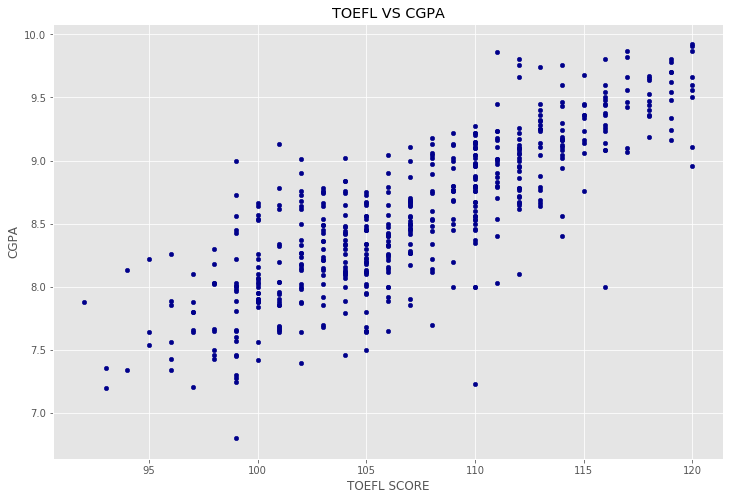

In [4]:
df_data_1.plot(kind= 'scatter', x= 'TOEFL Score', y= 'CGPA', figsize=(12, 8), color= 'darkblue')
plt.title('TOEFL VS CGPA')
plt.xlabel('TOEFL SCORE')
plt.ylabel('CGPA')
plt.show

c-Let's examine the relation between GRE score and CGPA

<function matplotlib.pyplot.show>

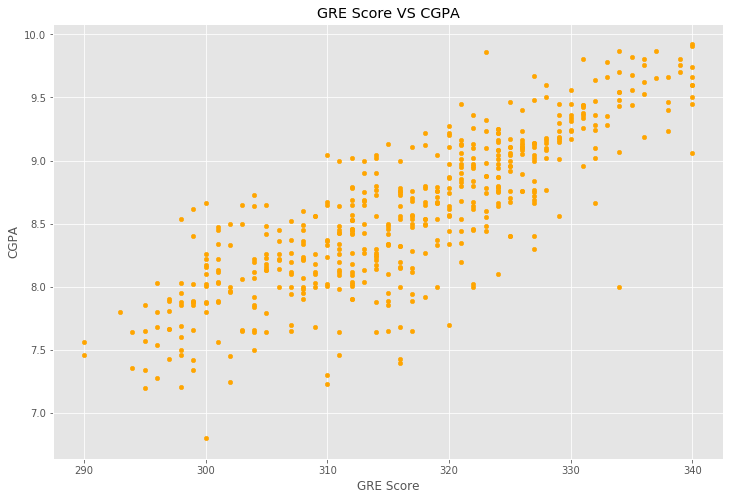

In [5]:
df_data_1.plot(kind= 'scatter', x='GRE Score', y= 'CGPA', figsize= (12, 8), color= 'orange')
plt.title( 'GRE Score VS CGPA')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show

d- Let's examine the correlation between the parameters of the dataset

In [6]:
df_data_1.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


e- Linear Regression and Multiple Regression

Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm= LinearRegression()

Let's predict CGPA  using GRE score as a predictor

In [38]:
X= df_data_1[['GRE Score']]
Y= df_data_1['CGPA']

Fitting the model

In [33]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let output prediction of CGPA 

In [34]:
yhat= lm.predict(X)
yhat[0:5]

array([ 9.48424286,  8.90934822,  8.5555669 ,  8.82090289,  8.46712157])

In [30]:
lm.intercept_

-5.418795105597944

In [31]:
lm.coef_

array([ 0.04422266])

Linear model

CGPA = -5.418795105597944 + 0.04422266*GRE Score

Multiple Regression

Predictor variables

In [47]:
m= df_data_1[['GRE Score', 'TOEFL Score']]

Fitting the model

In [49]:
lm.fit(m, df_data_1['CGPA'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lm.intercept_

-4.0638134826371477

In [52]:
lm.coef_

array([ 0.02634939,  0.04012807])

Multiple linear model

CGPA= -4.0638134826371477 + 0.02624939*GRE Score + 0.04012807* TOEFL Score

In [55]:
import seaborn as sns

GRE Score vs CGPA

(0, 10.081727092935983)

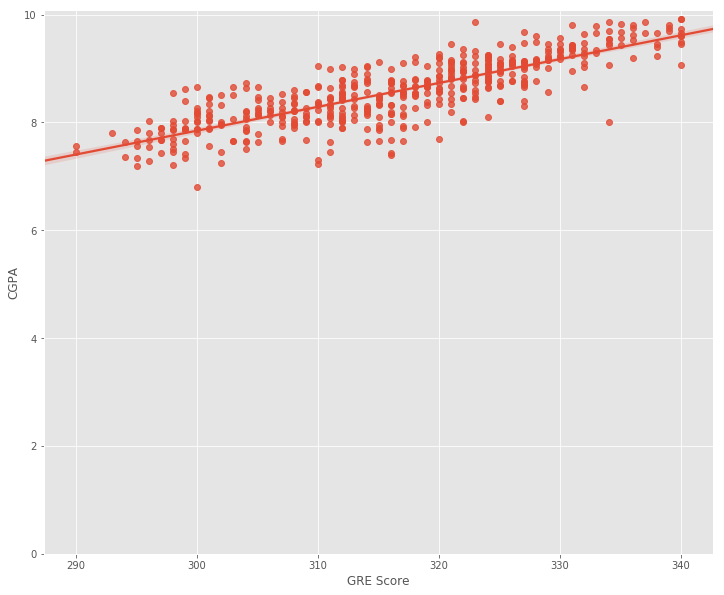

In [65]:
width= 12 
height= 10
plt.figure(figsize=(width, height))
sns.regplot(x= 'GRE Score', y='CGPA', data= df_data_1)
plt.ylim(0,)

TOEFL VS CGPA

(0, 10.081727092935983)

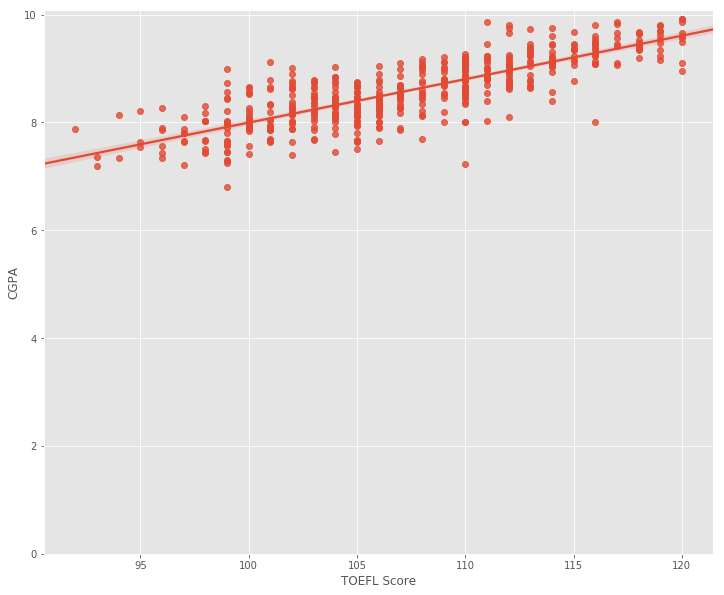

In [66]:
plt.figure(figsize=(width, height))
sns.regplot(x='TOEFL Score', y='CGPA', data=df_data_1)
plt.ylim(0,)

Residual plots

<function matplotlib.pyplot.show>

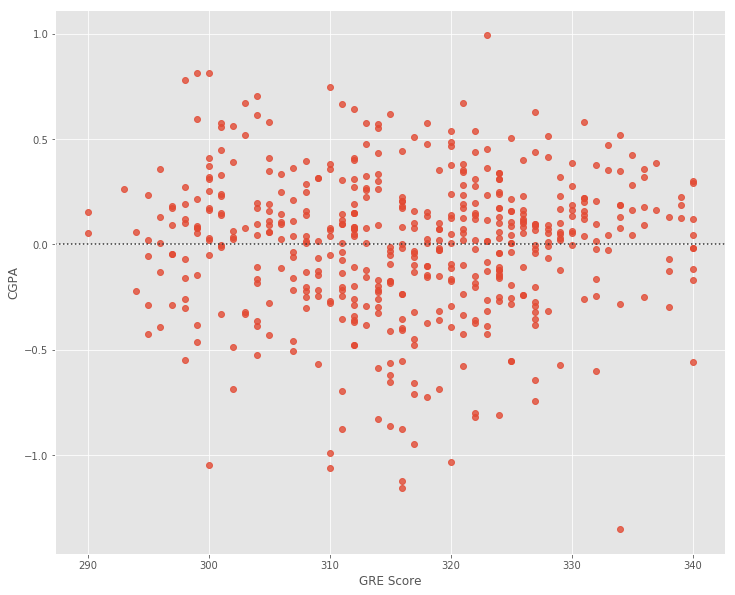

In [68]:
plt.figure(figsize=(width, height))
sns.residplot(x='GRE Score', y= 'CGPA', data= df_data_1)
plt.show

<function matplotlib.pyplot.show>

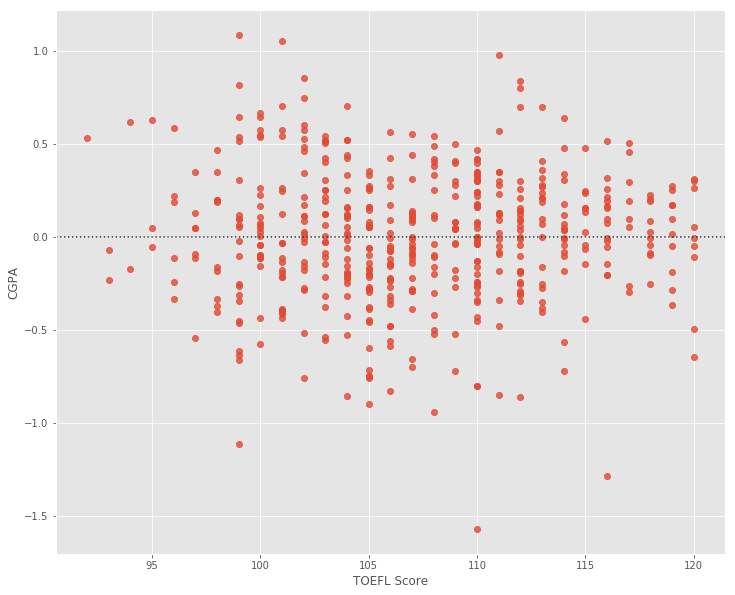

In [69]:
plt.figure(figsize= (width, height))
sns.residplot(x='TOEFL Score', y= 'CGPA', data= df_data_1)
plt.show

In [ ]:
Y_hat= lm.predict(m)

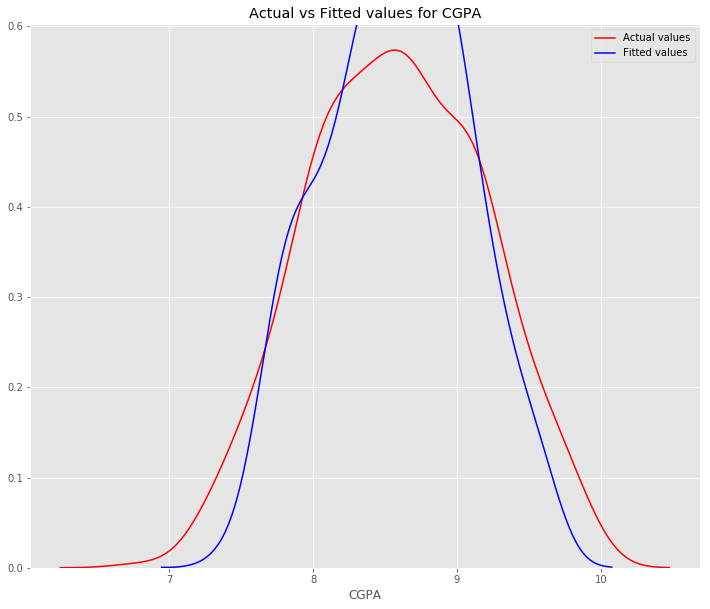

In [78]:
plt.figure(figsize=(width, height))

ax1= sns.distplot(df_data_1['CGPA'], hist= False, color= "r", label= "Actual values")
sns.distplot(yhat, hist= False, color ="b", label= "Fitted values", ax= ax1)
plt.title("Actual vs Fitted values for CGPA")
plt.show()
plt.close()

## 4- RESULTS INTERPRETATION

* From the descriptive statistics, we found that the average GRE score is :316.472, the average TOEFL score is : 107.192 with average CGPA of : 8.57644 so we will infere that  the  average chance of admission is: 0.72174. So a candidate with CGPA below 8.57644 is unlikely to get admission.

* As depicted by TOEFL score vs CGPA plot, there is a strong positive correlation between TOEFL score and CGPA. The coefficient is : 0.810574

* There is also a strong positive correlation between GRE score and CGPA. The coefficient is: 0.825878 as depicted by GRE VS CGPA plot.

* The residual plots showed the residuals are randomly and evenly spread out around the x_axis. Hence, we can reasonably infere that linear model is the best fit for the data set for prediction except few outliers which might have increased the deviation.

* The distribution of actual vs fitted values of CGPA, confirmed the analysis though there is a significant deviation of fitted mean value from the actual mean value.

## 5- Conclusion 

The general believe that the higher a student's GRE and TOEFL scores are the higher his undergraduate GPA and vice-versa is verified and we not reject the  null hypothesis.And if average GPA is  the cut off point for admission into Master degree, candidate whose GPA are above the average GPA will get admission.Thank  you.